In [ ]:
! pip install patool
import patoolib
patoolib.extract_archive('/content/drive/My Drive/cell-images-for detecting -malaria.zip',outdir='/content/malaria')

     |████████████████████████████████| 81kB 5.5MB/s 
patool: Extracting /content/drive/My Drive/cell-images-for detecting -malaria.zip ...
patool: running /usr/bin/7z x -o/content/malaria -- "/content/drive/My Drive/cell-images-for detecting -malaria.zip"
patool: ... /content/drive/My Drive/cell-images-for detecting -malaria.zip extracted to `/content/malaria'.


'/content/malaria'

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/content/malaria/cell_images"))

# Any results you write to the current directory are saved as output.

['Parasitized', 'cell_images', 'Uninfected']


In [ ]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
parasitized_data = os.listdir('/content/malaria/cell_images/cell_images/Parasitized')
print(parasitized_data[:10]) #the output we get are the .png files

uninfected_data = os.listdir('/content/malaria/cell_images/cell_images/Uninfected')
print('\n')
print(uninfected_data[:10])

['C176P137NThinF_IMG_20151201_121030_cell_20.png', 'C128P89ThinF_IMG_20151004_131231_cell_155.png', 'C137P98ThinF_IMG_20151005_163946_cell_17.png', 'C182P143NThinF_IMG_20151201_172257_cell_175.png', 'C56P17thinF_IMG_20150728_160537_cell_153.png', 'C183P144NThinF_IMG_20151201_223208_cell_122.png', 'C120P81ThinF_IMG_20151002_130150_cell_206.png', 'C129P90ThinF_IMG_20151004_134700_cell_11.png', 'C68P29N_ThinF_IMG_20150819_133236_cell_168.png', 'C70P31_ThinF_IMG_20150813_131609_cell_93.png']


['C112P73ThinF_IMG_20150930_131659_cell_54.png', 'C152P113ThinF_IMG_20151115_124853_cell_112.png', 'C79P40ThinF_IMG_20150817_104316_cell_55.png', 'C106P67ThinF_IMG_20150924_102413_cell_85.png', 'C133P94ThinF_IMG_20151004_154717_cell_90.png', 'C45P6ThinF_IMG_20151130_160135_cell_199.png', 'C142P103ThinF_IMG_20151005_222440_cell_49.png', 'C239ThinF_IMG_20151127_113008_cell_146.png', 'C91P52ThinF_IMG_20150821_124739_cell_11.png', 'C237ThinF_IMG_20151127_104954_cell_76.png']


**DATA VISUALIZATION**[](http://)

**1. PARASITIZED DATA**

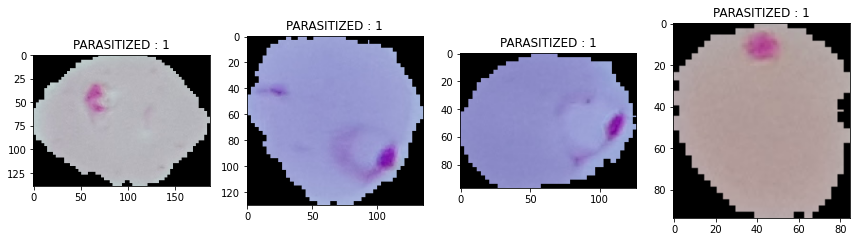

In [ ]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('/content/malaria/cell_images/cell_images/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

**2. UNINFECTTED DATA**

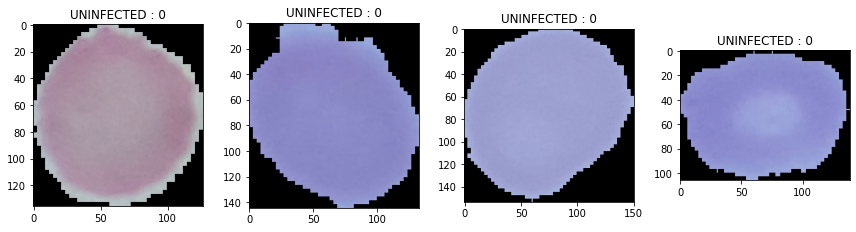

In [ ]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('/content/malaria/cell_images/cell_images/Uninfected' + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

**One can clearly see the difference between the infected and uninfected. You can observe a small clot inside the cellular image for infected while for the uninfected the cellular image is clean without any clots.**

In [ ]:
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread('/content/malaria/cell_images/cell_images/Parasitized' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('/content/malaria/cell_images/cell_images/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

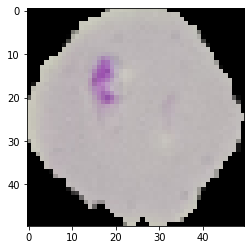

In [ ]:
plt.imshow(data[0])
plt.show()

In [ ]:
image_data = np.array(data)
labels = np.array(labels)

In [ ]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.3, random_state = 101, stratify=labels)

In [ ]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [ ]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (19290, 50, 50, 3)
SHAPE OF TESTING IMAGE DATA : (8268, 50, 50, 3)
SHAPE OF TRAINING LABELS : (19290, 2)
SHAPE OF TESTING LABELS : (8268, 2)


* **BUILDING THE CNN MODEL (without data augmentation)**

In [ ]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers

In [ ]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense,Input,MaxPool2D,Activation,Dropout,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Input, Dense
import keras
import datetime
import pandas as pd
import numpy as np

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  horizontal_flip = True,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  fill_mode = 'nearest',
                                  zoom_range = 0.3,
                                  rotation_range = 180)
val_datagen = ImageDataGenerator(rescale = 1/255.)

train_generator = train_datagen.flow(x_train, y_train, batch_size = 64, shuffle = True)
val_generator = val_datagen.flow(x_test, y_test, batch_size = 64, shuffle = True)

In [ ]:
%load_ext tensorboard

In [ ]:
!rm -rf ./logs/

In [ ]:
keras.backend.clear_session()

**WITH DATA AUGMENTATION**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  horizontal_flip = True,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  fill_mode = 'nearest',
                                  zoom_range = 0.3,
                                  rotation_range = 180)
val_datagen = ImageDataGenerator(rescale = 1/255.)

train_generator = train_datagen.flow(x_train, y_train, batch_size = 64, shuffle = False)
val_generator = val_datagen.flow(x_test, y_test, batch_size = 64, shuffle = False)

In [ ]:
'''#calling the same model as above
model= CNNbuild(height = height, width = width, classes = classes, channels = channels)'''

'#calling the same model as above\nmodel= CNNbuild(height = height, width = width, classes = classes, channels = channels)'

In [ ]:
'''#compile the model
optim = optimizers.Adam(lr = 0.001, decay = 0.001 / 64)
model.compile(loss = 'categorical_crossentropy', optimizer = optim, metrics = ['accuracy'])'''

In [ ]:
'''from keras.callbacks import ModelCheckpoint
filepath="model_save/my_model.h5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',  verbose=1, save_best_only=True, mode='auto')'''

In [ ]:
del model

In [ ]:
model.summary()

NameError: ignored

In [ ]:
#pretrained CNN and left over model
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    from keras.applications.vgg16 import VGG16
    from keras import models

    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    vgg=VGG16(include_top=False, pooling='avg', weights='imagenet', input_shape=inputShape)
    #vgg.summary()
    from keras.layers import Dense

    #leverage layers of pretrained vgg16 model
    layer_name='block2_pool'
    my_model=Model(inputs=vgg.input, outputs=vgg.get_layer(layer_name).output)

    for layer in my_model.layers:
      layer.trainable=False

    #my_model.summary()
    #model=models.Sequential()

    model.add(my_model)
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))
  
    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model
#instantiate the model
height = 50
width = 50
classes = 2
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
model.summary()
opt = optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_2 (Model)              (None, 12, 12, 128)       260160    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 6, 6, 128)         512       
_________________________________________________________________
dropout_4 (Dropout)          (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 32)          36896     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 2, 2, 32)         

In [ ]:
'''log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True)'''

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=val_generator.n//val_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=val_generator,
                    validation_steps=STEP_SIZE_VALID, #callbacks=[tensorboard_callback,checkpoint],
                    epochs=300)

Epoch 1/300
301/301 [==============================] - 17s 57ms/step - loss: 0.2804 - accuracy: 0.8898 - val_loss: 0.1052 - val_accuracy: 0.9514
Epoch 2/300
301/301 [==============================] - 17s 55ms/step - loss: 0.2820 - accuracy: 0.8877 - val_loss: 0.1238 - val_accuracy: 0.9442
Epoch 3/300
301/301 [==============================] - 17s 55ms/step - loss: 0.2786 - accuracy: 0.8902 - val_loss: 0.1367 - val_accuracy: 0.9492
Epoch 4/300
301/301 [==============================] - 17s 55ms/step - loss: 0.2843 - accuracy: 0.8851 - val_loss: 0.1450 - val_accuracy: 0.9494
Epoch 5/300
301/301 [==============================] - 17s 55ms/step - loss: 0.2829 - accuracy: 0.8890 - val_loss: 0.1017 - val_accuracy: 0.9466
Epoch 6/300
301/301 [==============================] - 17s 55ms/step - loss: 0.2830 - accuracy: 0.8855 - val_loss: 0.1037 - val_accuracy: 0.9466
Epoch 7/300
301/301 [==============================] - 17s 55ms/step - loss: 0.2820 - accuracy: 0.8885 - val_loss: 0.1931 - val_ac

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 12, 12, 128)       260160    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 6, 128)         512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 32)          36896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 2, 2, 32)         

In [ ]:
len(model.layers)

14

In [ ]:
# fine Tuning
for i in range(4):
  model.layers[0].layers[i].trainable=True
for i in range(4, 7):
  model.layers[0].layers[i].trainable=True
for i in range(1,4):
  model.layers[i].trainable=True
for i in range(4, 7):
  model.layers[i].trainable=True
for i in range(7, len(model.layers)):
  model.layers[i].trainable=True
'''model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])'''
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_2 (Model)              (None, 12, 12, 128)       260160    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 6, 6, 128)         512       
_________________________________________________________________
dropout_4 (Dropout)          (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 32)          36896     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 2, 2, 32)         

In [ ]:
from keras.models import Sequential,save_model, load_model
save_model(model, '/content/drive/My Drive/vgg_model_1st_untrained.h5')

In [ ]:
new_model=load_model('/content/save_model/M/model.h5',compile=True)

In [ ]:
new_model=model
predict= new_model.evaluate_generator(val_generator)

In [ ]:
print(f'LOSS ON TEST DATA AFTER DATA AUGMENTATION : {predict[0]}')
print(f'ACCURACY ON TEST DATA AFTER DATA AUGMENTATION : {predict[1]}')

LOSS ON TEST DATA AFTER DATA AUGMENTATION : 0.048575326800346375
ACCURACY ON TEST DATA AFTER DATA AUGMENTATION : 0.9574262499809265
